In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df=pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Bike%20Prices.csv')

In [ ]:
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [ ]:
df=df.dropna()

In [ ]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


In [ ]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [ ]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [ ]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [ ]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

In [ ]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [ ]:
df.shape

(626, 8)

In [ ]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

In [ ]:
df.replace({'Owner':{'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3}},inplace=True)

In [ ]:
y=df['Selling_Price']

In [ ]:
y.shape

(626,)

In [ ]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [ ]:
x=df.drop(['Brand','Model','Selling_Price'],axis=1)

In [ ]:
x.shape

(626, 5)

In [ ]:
x

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2519)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape,

((438, 5), (188, 5), (438,), (188,))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()

In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)

In [ ]:
y_pred.shape

(188,)

In [ ]:
y_pred

array([ 49406.49650777,  38013.73036061,  59261.83917311,  41875.84044909,
        35979.22852005,  25732.83558292,  54019.44105301,  45930.23880916,
        80915.19815388,  43518.72700315,  41384.00370738,   7427.63277878,
        24669.77585696,  48516.3616943 ,  59521.26766419,  52880.00276735,
       339205.60289348,  67899.35799848,  48328.50093335,  59153.31197266,
        53184.10780487,  32277.06020102,  51940.37005964,  22195.86725187,
        75654.20567777,  20040.90235213,  51127.45045436,   -518.81747722,
        67920.64690028,  26164.99780654,  27370.44567586,  27759.76399835,
        61262.50965836,  40838.20832302,  75281.24895199,  46440.12171456,
        52882.67683872,  22297.12642587,  59728.45571695,  43821.51986597,
        34761.9316187 ,  21437.04131216,  53272.34794221,  18700.29622003,
        53048.13119978,  61362.99966116,  27151.13073247,  48182.61024022,
        33073.49472127,  47757.96553845, 102223.25054023,  50255.21030521,
        59923.88327969,  

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

179344014.00405946

In [ ]:
mean_absolute_error(y_test,y_pred)

10089.133885507124

In [ ]:
r2_score(y_test,y_pred)

0.8830837781393588

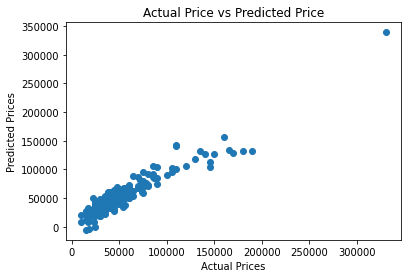

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
df_new=df.sample(1)

In [ ]:
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
502,Bajaj,Bajaj Avenger 220,90000,2019,0,0,1300,95000.0


In [ ]:
df_new.shape

(1, 8)

In [ ]:
x_new=df_new.drop(['Brand','Model','Selling_Price'],axis=1)

In [ ]:
y_pred_new=lr.predict(x_new)

In [ ]:
y_pred_new

array([85478.79197119])